In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

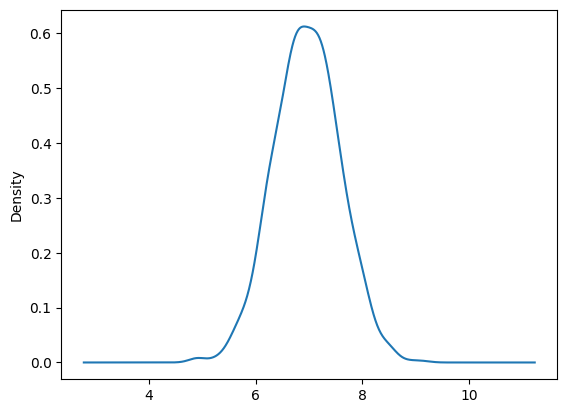

In [5]:
df['cgpa'].plot(kind='kde')

/tmp/ipykernel_24133/4015579247.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipykernel_24133/4015579247.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


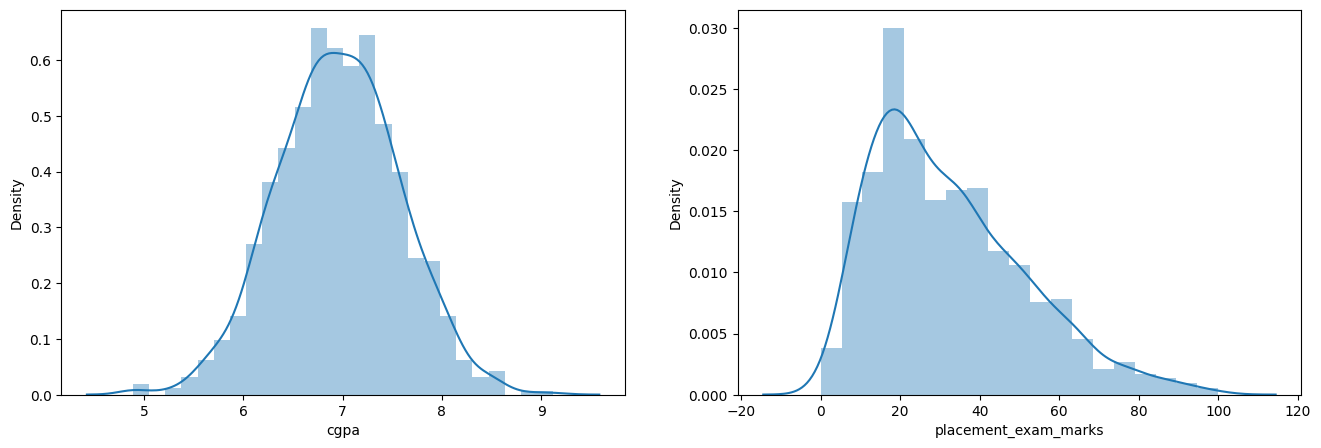

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])


plt.show()






In [8]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [9]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

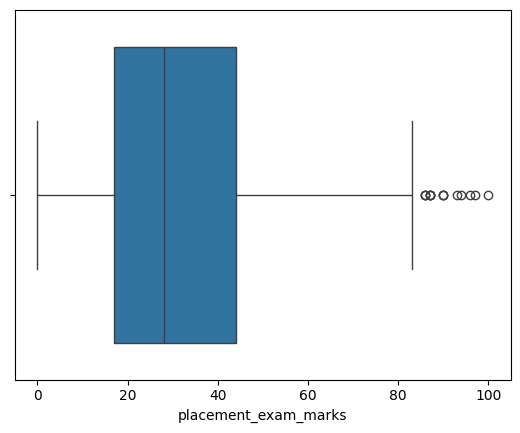

In [12]:
sns.boxplot(df['placement_exam_marks'],orient='h')


In [13]:
## Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)


In [14]:
percentile75

np.float64(44.0)

In [15]:
iqr = percentile75 - percentile25

In [16]:
iqr

np.float64(27.0)

In [17]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


In [18]:
upper_limit , lower_limit

(np.float64(84.5), np.float64(-23.5))

## Finding Outliers

In [19]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [20]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [21]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [22]:
new_df.shape


(985, 3)

/tmp/ipykernel_24133/1649400947.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipykernel_24133/1649400947.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks'>

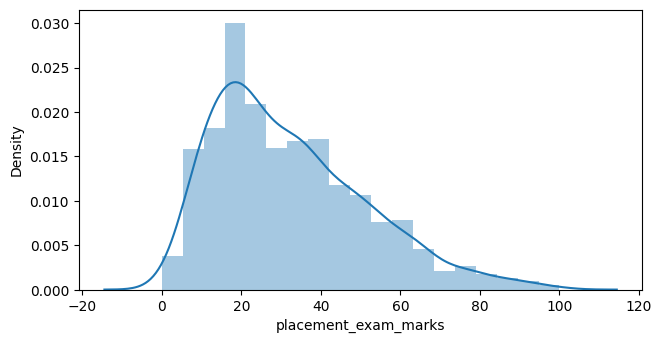

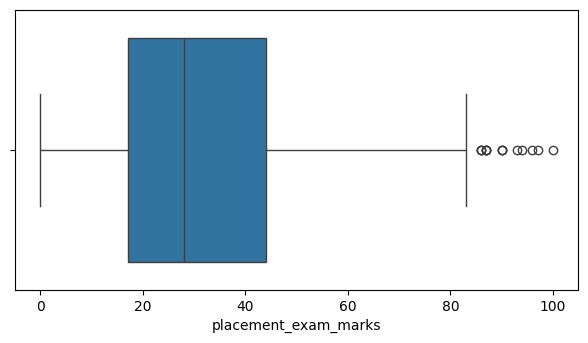

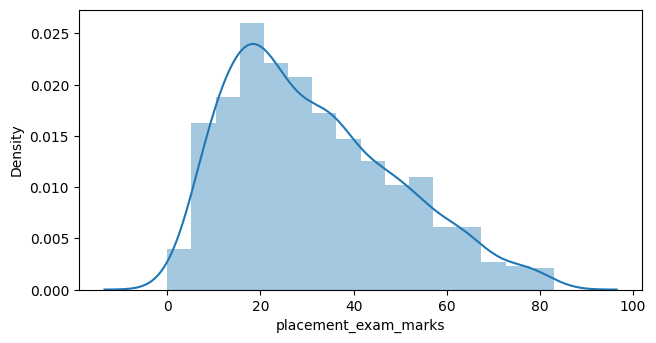

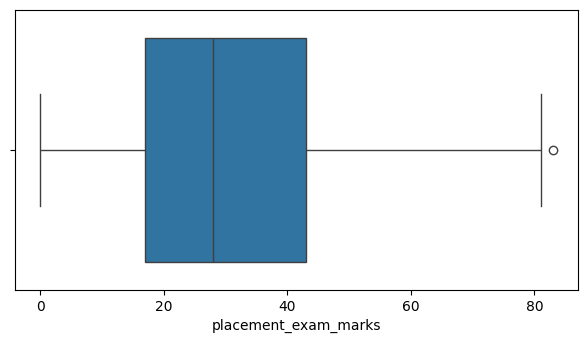

In [25]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])


plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')


plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])


plt.figure(figsize=(16,8))
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')

## Capping

In [26]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)






In [27]:
new_df_cap.shape

(1000, 3)

In [28]:
new_df_cap['placement_exam_marks'].skew()

np.float64(0.7566838441374795)

/tmp/ipykernel_24133/2066706054.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipykernel_24133/2066706054.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks'>

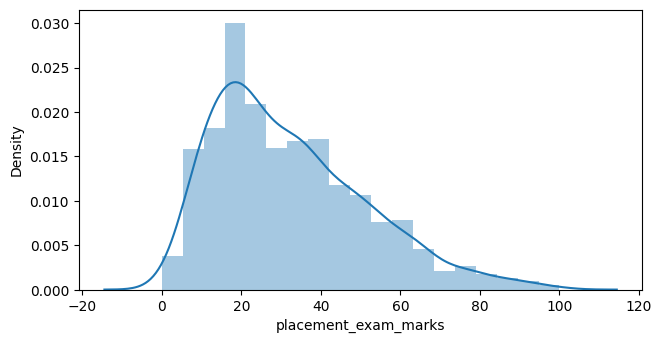

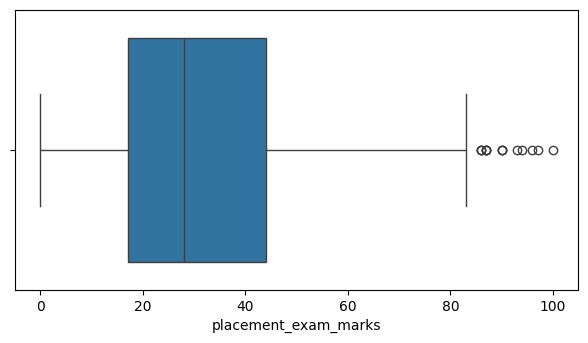

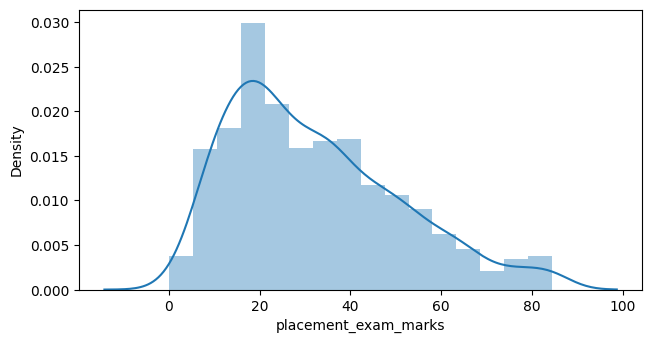

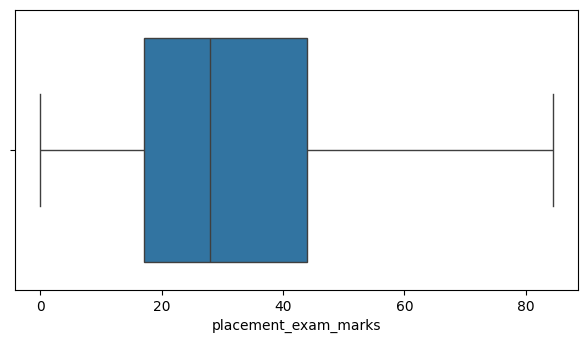

In [29]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])


plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')


plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])


plt.figure(figsize=(16,8))
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'],orient='h')
